Tâche 1 : Chargement des données

1 - Importer les données à l'aide de la bibliothèque Pandas

In [92]:
import numpy as np
import pandas as pd

df = pd.read_csv('../data/raw/assurance-maladie.csv')




2 - Vérifier le type et la structure des colonnes

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Tâche 2 : Analyse exploratoire des données (EDA)

1 - Comprendre la structure générale du jeu de données.

In [93]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


2 - Effectuer une analyse descriptive des données (moyennes, médianes, écarts-types pour les variables numériques ; fréquences pour les catégoriques).

In [16]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.info()


In [37]:
df['sex'].value_counts(normalize = True)*100

sex
male      50.523169
female    49.476831
Name: proportion, dtype: float64

In [38]:
df['smoker'].value_counts(normalize = True)

smoker
no     79.521674
yes    20.478326
Name: proportion, dtype: float64

In [14]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

3 - Identifier les valeurs manquantes et les doublons.

In [94]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [95]:
df.duplicated().sum()

np.int64(1)

In [96]:

df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


4 - Analyser la distribution des variables numériques

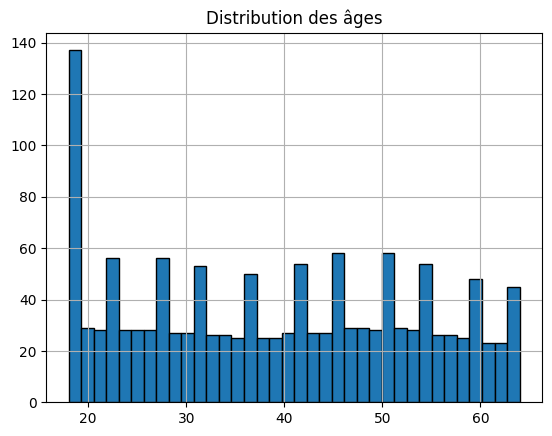

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import math 


df['age'].hist(bins=int(math.sqrt(df.shape[0])), edgecolor='black')
plt.title("Distribution des âges")
plt.show()


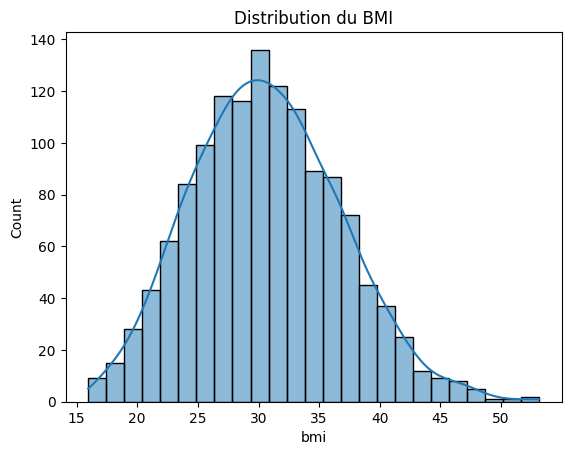

In [83]:
    
sns.histplot(df['bmi'], kde=True)
plt.title("Distribution du BMI")
plt.show()

5 - Étudier les relations entre variables à l'aide de matrices de corrélation et de visualisations (ex. : pairplots ou heatmaps).

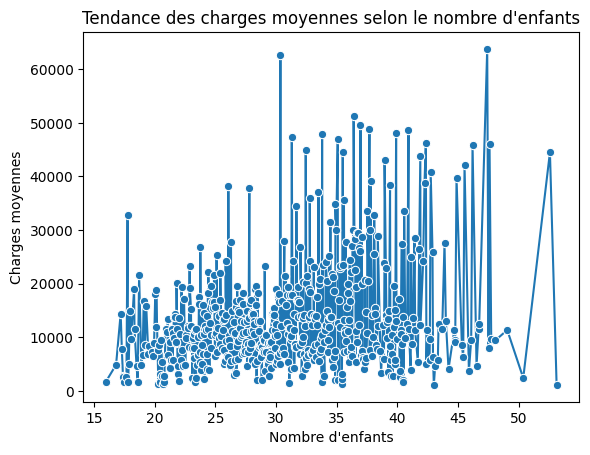

In [97]:
    
# sns.lineplot(data=df, x="children", y="charges", estimator=np.mean, ci=None, marker="o")
sns.lineplot(data=df, x="bmi", y="charges", estimator=np.mean, ci=None, marker="o")
# sns.lineplot(data=df, x="age", y="charges", estimator=np.mean, ci=None, marker="o")
plt.title("Tendance des charges moyennes selon le nombre d'enfants")
plt.ylabel("Charges moyennes")
plt.xlabel("Nombre d'enfants")
plt.show()


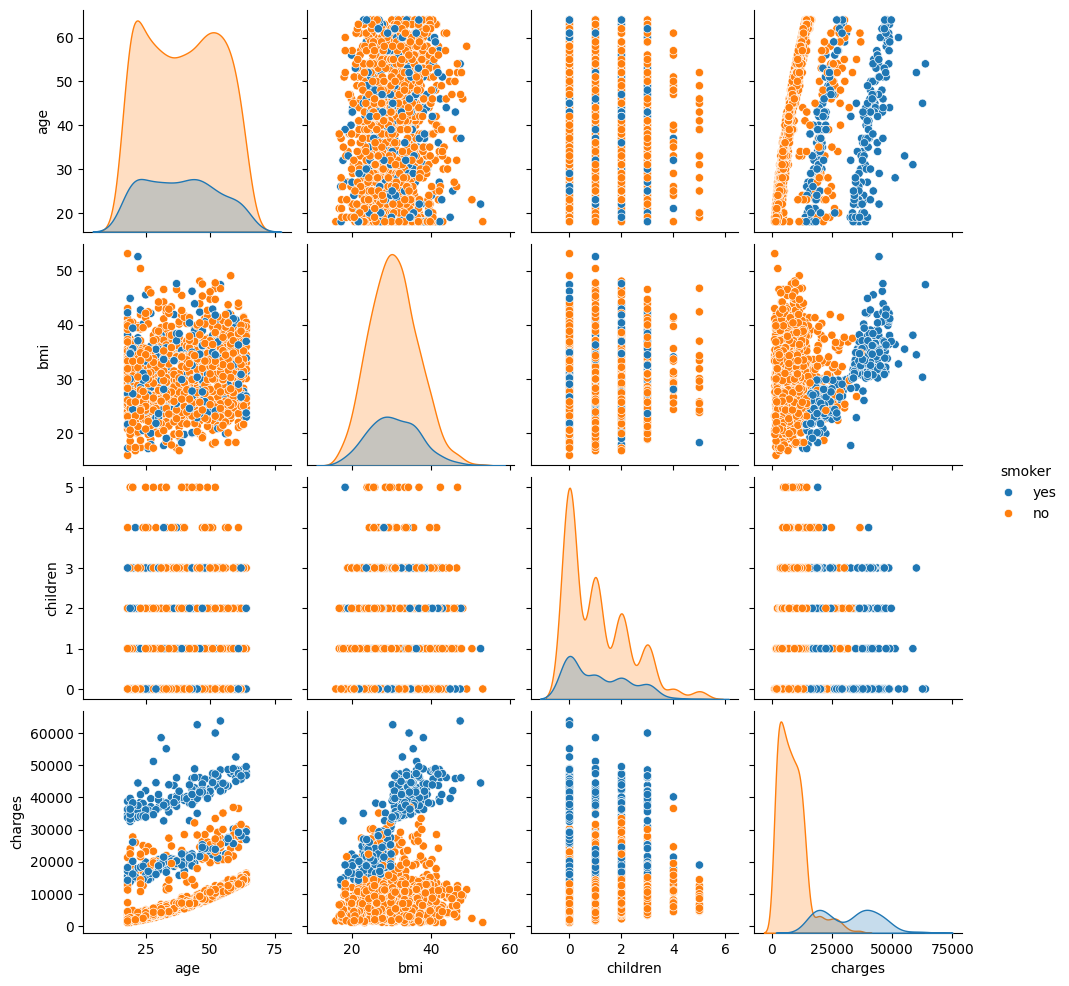

In [46]:
sns.pairplot(df, hue="smoker") 
plt.show()


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


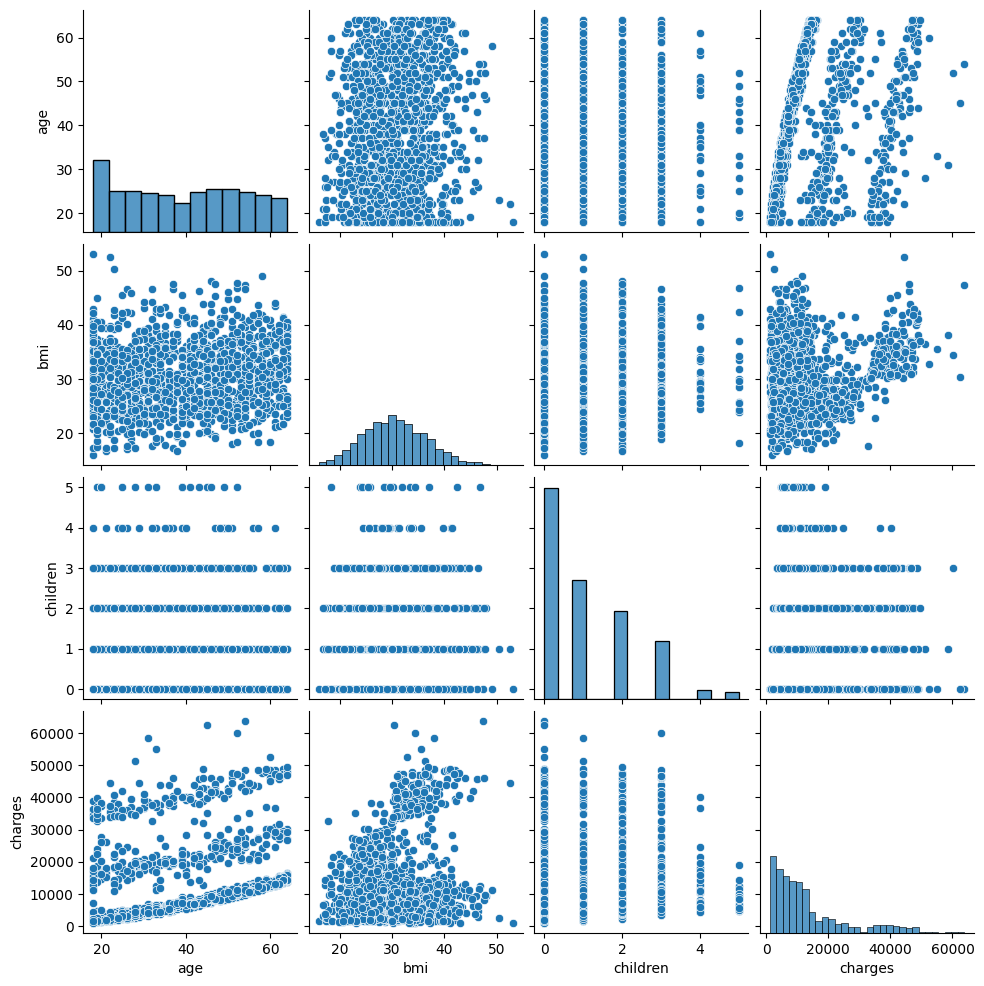

In [63]:
sns.pairplot(df) 
plt.show()

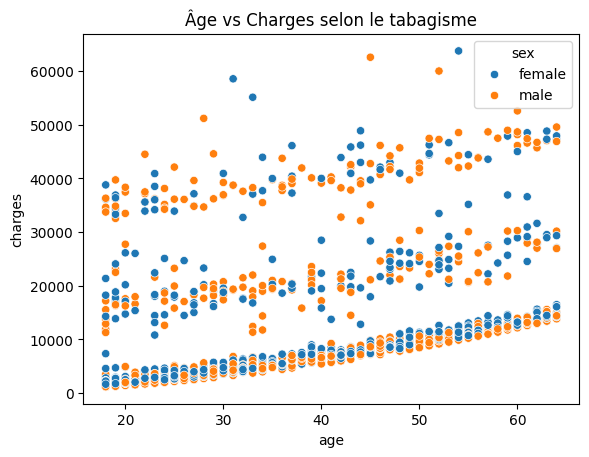

In [69]:
# sns.scatterplot(data=df, x="age", y="charges", hue="smoker")
sns.scatterplot(data=df, x="age", y="charges", hue="sex")
plt.title("Âge vs Charges selon le tabagisme")
plt.show()


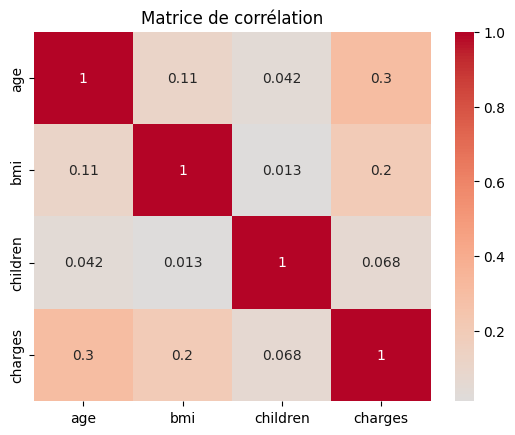

In [80]:

corr = df.corr(numeric_only=True)  
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Matrice de corrélation")
plt.show()


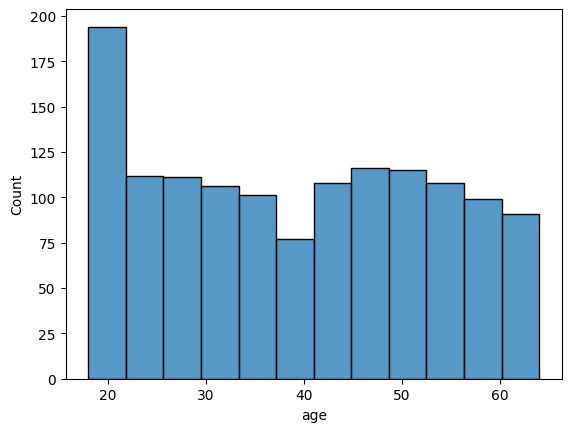

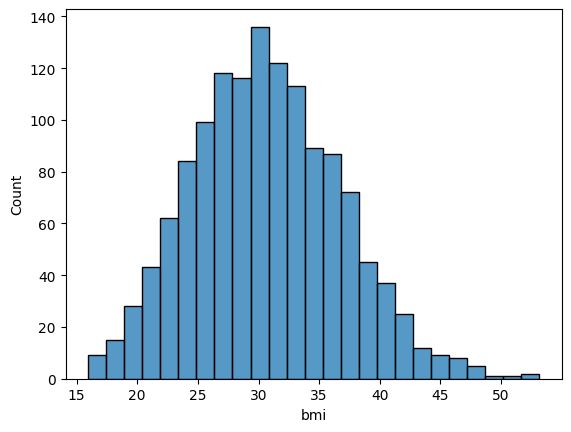

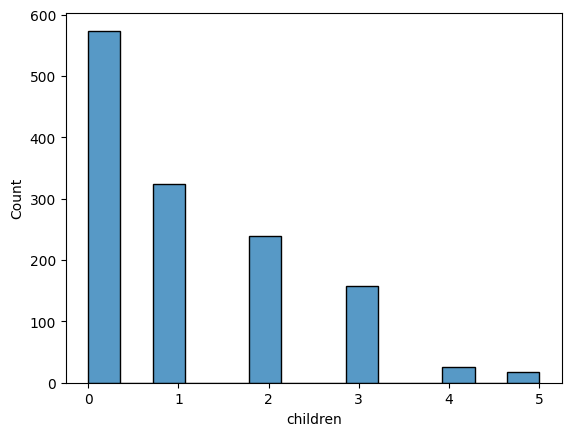

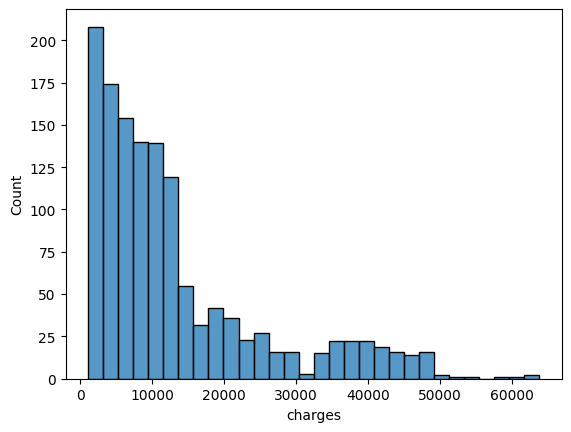

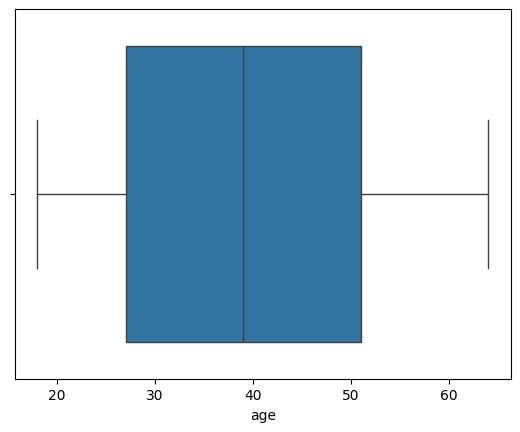

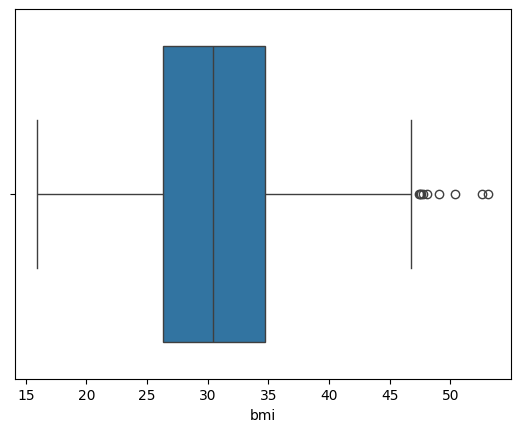

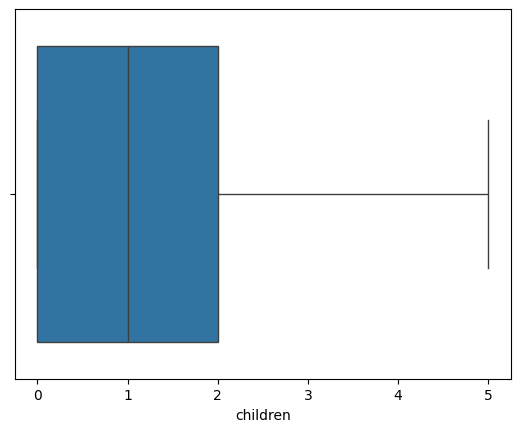

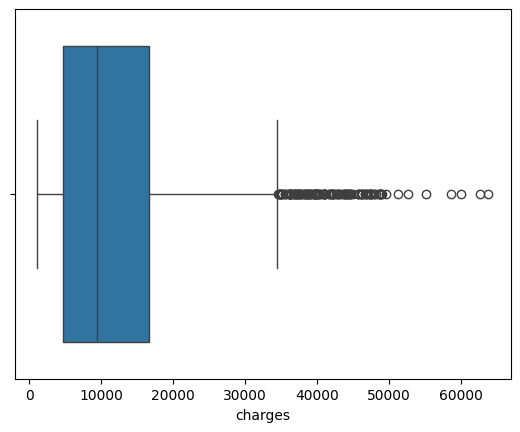

In [98]:
warnings.filterwarnings("ignore")
for i  in df.select_dtypes(include="number") :
    sns.histplot(data=df ,x=i)
    plt.show()
for i  in df.select_dtypes(include="number").columns :
    sns.boxplot(data=df ,x=i)
    plt.show()